In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv("student-mat.csv")
data2=pd.read_csv("student-por.csv")
#merging two data set
data=data1.append(data2)
#now reset the index column
data=data.reset_index()

In [30]:
data.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

COLUMNS INFO
_____________________________

school>>Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex>>Student's sex (binary: 'F' - female or 'M' - male)
age>>Student's age (numeric: from 15 to 22)
address>>Student's home address type (binary: 'U' - urban or 'R' - rural)
famsize>>Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus>>Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)
Medu>>Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
Fedu>>Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
Mjob>>Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob>>Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason>>Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian>>Student's guardian (nominal: 'mother', 'father' or 'other')
traveltime>>Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime>>Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures>>Number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup>>Extra educational support (binary: yes or no)

famsup>>Family educational support (binary: yes or no)

paid>>Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities>>Extra-curricular activities (binary: yes or no)

nursery>>Attended nursery school (binary: yes or no)

higher>>Wants to take higher education (binary: yes or no)

internet>>Internet access at home (binary: yes or no)

romantic>>With a romantic relationship (binary: yes or no)

famrel>>Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime>>Free time after school (numeric: from 1 - very low to 5 - very high)

goout>>Going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc>>Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc>>Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health>>Current health status (numeric: from 1 - very bad to 5 - very good)

absences>>Number of school absences (numeric: from 0 to 93)

G1>>First period grade (numeric: from 0 to 20)

G2>>Second period grade (numeric: from 0 to 20)

G3>>Final grade (numeric: from 0 to 20, output target)
student-mat.csv (41 KB)
20 of 33 columns

school
Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex
Student's sex (binary: 'F' - female or 'M' - male)

age
Student's age (numeric: from 15 to 22)

address
Student's home address type (binary: 'U' - urban or 'R' - rural)

famsize
Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus
Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)

Medu
Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)

Fedu
Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)

Mjob
Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob
Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason
Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian
Student's guardian (nominal: 'mother', 'father' or 'other')

traveltime
Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime
Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures
Number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup
Extra educational support (binary: yes or no)

famsup
Family educational support (binary: yes or no)

paid
Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities
Extra-curricular activities (binary: yes or no)

nursery
Attended nursery school (binary: yes or no)
GP
88%
MS
12%

In [57]:
#how relationship effect the result
#so lets take the columns fsize Pstatus romantic famrel
require=[ 'Pstatus', 'romantic', 'famrel']
x=data[require]
x1=data1[require]
x2=data2[require]
#lets say the result depend upon 1*g1+1*g2+3*g3>>> out of 100 for standarization
y=pd.DataFrame(data['G1']+data['G2']+(3*data['G3']),columns=['results'])
y1=pd.DataFrame(data1['G1']+data1['G2']+(3*data1['G3']),columns=['results'])
y2=pd.DataFrame(data2['G1']+data2['G2']+(3*data2['G3']),columns=['results'])


In [43]:
# now visulise how studens perform wrt to the contrains
(m,n)=y.shape
mean_mark=sum(y["results"])/m
#mean_mark
count=0
romantic=[[],[]]
for i in range(m):
    if x['romantic'][i]=='yes':
        romantic[1].append(y['results'][i])
        count+=1
    else:
        romantic[0].append(y['results'][i])
romantic=[sum(romantic[0])/(m-count),sum(romantic[1])/count]
print("\n mean marks of the students==",mean_mark,"\n mean mark of student not in roamntic relationship==",romantic[0],"\n mean marks of the students in romantic relationship=",romantic[1])


# now visulise how studens perform wrt to the contrains
(m,n)=y1.shape
mean_mark=sum(y1["results"])/m
#mean_mark
count=0
romantic=[[],[]]
for i in range(m):
    if x1['romantic'][i]=='yes':
        romantic[1].append(y1['results'][i])
        count+=1
    else:
        romantic[0].append(y1['results'][i])
romantic=[sum(romantic[0])/(m-count),sum(romantic[1])/count]
print("\n mean marks of the students==",mean_mark,"\n mean mark of student not in roamntic relationship==",romantic[0],"\n mean marks of the students in romantic relationship=",romantic[1])


# now visulise how studens perform wrt to the contrains
(m,n)=y2.shape
mean_mark=sum(y2["results"])/m
#mean_mark
count=0
romantic=[[],[]]
for i in range(m):
    if x2['romantic'][i]=='yes':
        romantic[1].append(y2['results'][i])
        count+=1
    else:
        romantic[0].append(y2['results'][i])
romantic=[sum(romantic[0])/(m-count),sum(romantic[1])/count]
print("\n mean marks of the students==",mean_mark,"\n mean mark of student not in roamntic relationship==",romantic[0],"\n mean marks of the students in romantic relationship=",romantic[1])


 mean marks of the students== 56.485632183908045 
 mean mark of student not in roamntic relationship== 57.69390787518574 
 mean marks of the students in romantic relationship= 54.293800539083556

 mean marks of the students== 52.868354430379746 
 mean mark of student not in roamntic relationship== 54.5171102661597 
 mean marks of the students in romantic relationship= 49.583333333333336

 mean marks of the students== 58.687211093990754 
 mean mark of student not in roamntic relationship== 59.73170731707317 
 mean marks of the students in romantic relationship= 56.89539748953975


In [46]:
(m,n)=y.shape
count=0
mean_mark=sum(y["results"])/m
Pstatus=[[],[]]
for i in range(m):
    if x['Pstatus'][i]=='A':
        Pstatus[1].append(y['results'][i])
        count+=1
    else:
        Pstatus[0].append(y['results'][i])
Pstatus=[sum(Pstatus[0])/(m-count),sum(Pstatus[1])/count]
print("\n mean marks of the students==",mean_mark,"\n mean mark of student whose parents are living together==",Pstatus[0],"\n mean marks of the students whose parents are living apart=",Pstatus[1])

(m,n)=y1.shape
count=0
mean_mark=sum(y1["results"])/m
Pstatus=[[],[]]
for i in range(m):
    if x1['Pstatus'][i]=='A':
        Pstatus[1].append(y1['results'][i])
        count+=1
    else:
        Pstatus[0].append(y1['results'][i])
Pstatus=[sum(Pstatus[0])/(m-count),sum(Pstatus[1])/count]
print("\n mean marks of the students==",mean_mark,"\n mean mark of student whose parents are living together==",Pstatus[0],"\n mean marks of the students whose parents are living apart=",Pstatus[1])


(m,n)=y2.shape
count=0
mean_mark=sum(y2["results"])/m
Pstatus=[[],[]]
for i in range(m):
    if x2['Pstatus'][i]=='A':
        Pstatus[1].append(y2['results'][i])
        count+=1
    else:
        Pstatus[0].append(y2['results'][i])
Pstatus=[sum(Pstatus[0])/(m-count),sum(Pstatus[1])/count]
print("\n mean marks of the students==",mean_mark,"\n mean mark of student whose parents are living together==",Pstatus[0],"\n mean marks of the students whose parents are living apart=",Pstatus[1])


 mean marks of the students== 56.485632183908045 
 mean mark of student whose parents are living together== 56.344528710725896 
 mean marks of the students whose parents are living apart= 57.56198347107438

 mean marks of the students== 52.868354430379746 
 mean mark of student whose parents are living together== 52.52542372881356 
 mean marks of the students whose parents are living apart= 55.829268292682926

 mean marks of the students== 58.687211093990754 
 mean mark of student whose parents are living together== 58.72056239015817 
 mean marks of the students whose parents are living apart= 58.45


mean marks of the students== 56.485632183908045 
 mean mark of student whose family relationship is 1== 53.0 
 mean mark of student whose family relationship is 2== 53.319148936170215 
 mean mark of student whose family relationship is 3== 54.76331360946745 
 mean mark of student whose family relationship is 4== 95.31952662721893 
 mean mark of student whose family relationship is 5== 56.32517482517483


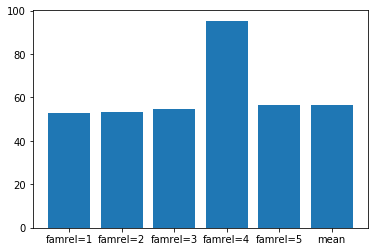

mean marks of the students== 52.868354430379746 
 mean mark of student whose family relationship is 1== 54.125 
 mean mark of student whose family relationship is 2== 52.111111111111114 
 mean mark of student whose family relationship is 3== 51.25 
 mean mark of student whose family relationship is 4== 84.52941176470588 
 mean mark of student whose family relationship is 5== 54.22641509433962


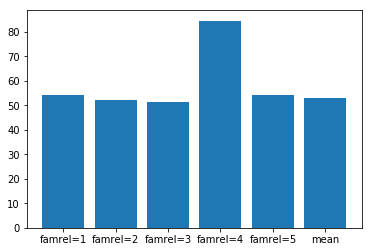

mean marks of the students== 58.687211093990754 
 mean mark of student whose family relationship is 1== 52.59090909090909 
 mean mark of student whose family relationship is 2== 54.06896551724138 
 mean mark of student whose family relationship is 3== 57.12871287128713 
 mean mark of student whose family relationship is 4== 102.58415841584159 
 mean mark of student whose family relationship is 5== 57.56111111111111


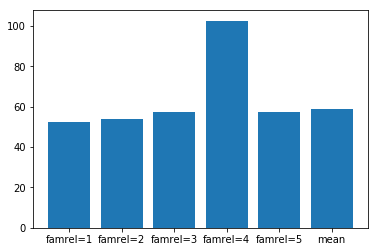

In [47]:

#mean_mark
(m,n)=y.shape
mean_mark=sum(y["results"])/m
count1=0
count2=0
count3=0
count4=0
count5=0
famrel=[[],[],[],[],[]]
for i in range(m):
    if x['famrel'][i]==1:
        famrel[0].append(y['results'][i])
        count1+=1
    elif x['famrel'][i]==2:
        famrel[1].append(y['results'][i])
        count2+=1
    elif x['famrel'][i]==3:
        famrel[2].append(y['results'][i])
        count3+=1
    elif x['famrel'][i]==4:
        famrel[3].append(y['results'][i])
        count4+=1
    else:
        famrel[4].append(y['results'][i])
        count5+=1
famrel=[sum(famrel[0])/(count1),sum(famrel[1])/count2,sum(famrel[2])/count3,sum(famrel[4])/count3,sum(famrel[4])/count5]
print("mean marks of the students==",mean_mark,
      "\n mean mark of student whose family relationship is 1==",famrel[0],"\n mean mark of student whose family relationship is 2==",famrel[1]
      ,"\n mean mark of student whose family relationship is 3==",famrel[2],"\n mean mark of student whose family relationship is 4==",famrel[3]
      ,"\n mean mark of student whose family relationship is 5==",famrel[4])
plt.figure()
plt.bar(['mean',"famrel=1","famrel=2","famrel=3","famrel=4","famrel=5"],[mean_mark]+famrel)
plt.show()


(m,n)=y1.shape
mean_mark=sum(y1["results"])/m
count1=0
count2=0
count3=0
count4=0
count5=0
famrel=[[],[],[],[],[]]
for i in range(m):
    if x1['famrel'][i]==1:
        famrel[0].append(y1['results'][i])
        count1+=1
    elif x1['famrel'][i]==2:
        famrel[1].append(y1['results'][i])
        count2+=1
    elif x1['famrel'][i]==3:
        famrel[2].append(y1['results'][i])
        count3+=1
    elif x1['famrel'][i]==4:
        famrel[3].append(y1['results'][i])
        count4+=1
    else:
        famrel[4].append(y1['results'][i])
        count5+=1
famrel=[sum(famrel[0])/(count1),sum(famrel[1])/count2,sum(famrel[2])/count3,sum(famrel[4])/count3,sum(famrel[4])/count5]
print("mean marks of the students==",mean_mark,
      "\n mean mark of student whose family relationship is 1==",famrel[0],"\n mean mark of student whose family relationship is 2==",famrel[1]
      ,"\n mean mark of student whose family relationship is 3==",famrel[2],"\n mean mark of student whose family relationship is 4==",famrel[3]
      ,"\n mean mark of student whose family relationship is 5==",famrel[4])
plt.figure()
plt.bar(['mean',"famrel=1","famrel=2","famrel=3","famrel=4","famrel=5"],[mean_mark]+famrel)
plt.show()


(m,n)=y2.shape
mean_mark=sum(y2["results"])/m
count1=0
count2=0
count3=0
count4=0
count5=0
famrel=[[],[],[],[],[]]
for i in range(m):
    if x2['famrel'][i]==1:
        famrel[0].append(y2['results'][i])
        count1+=1
    elif x2['famrel'][i]==2:
        famrel[1].append(y2['results'][i])
        count2+=1
    elif x2['famrel'][i]==3:
        famrel[2].append(y2['results'][i])
        count3+=1
    elif x2['famrel'][i]==4:
        famrel[3].append(y2['results'][i])
        count4+=1
    else:
        famrel[4].append(y2['results'][i])
        count5+=1
famrel=[sum(famrel[0])/(count1),sum(famrel[1])/count2,sum(famrel[2])/count3,sum(famrel[4])/count3,sum(famrel[4])/count5]
print("mean marks of the students==",mean_mark,
      "\n mean mark of student whose family relationship is 1==",famrel[0],"\n mean mark of student whose family relationship is 2==",famrel[1]
      ,"\n mean mark of student whose family relationship is 3==",famrel[2],"\n mean mark of student whose family relationship is 4==",famrel[3]
      ,"\n mean mark of student whose family relationship is 5==",famrel[4])
plt.figure()
plt.bar(['mean',"famrel=1","famrel=2","famrel=3","famrel=4","famrel=5"],[mean_mark]+famrel)
plt.show()


In [63]:
#now we get X and y for our model
# now we have to import for 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
obj1=LabelEncoder()
x['Pstatus']=obj.fit_transform(x["Pstatus"])
x['romantic']=obj1.fit_transform(x["romantic"])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train, y_train)
forest.score(X_train, y_train)
y_pred = forest.predict(X_test)
acc_test = metrics.accuracy_score(y_test,y_pred)
acc_test

C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

0.0430622009569378

          importance
feature             
famrel         0.643
Pstatus        0.183
romantic       0.174


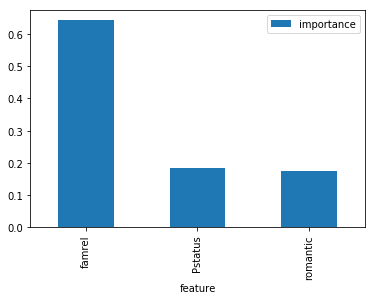

In [64]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()